In [3]:
from sklearn.datasets import load_diabetes
#from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LinearRegression
#from sklearn.metrics import mean_squared_error
#import numpy as np

diabetes = load_diabetes()
X = diabetes.data #contains feature values (numerical values of the dataset) does not contain feature(column) names
y = diabetes.target #contains labels (class labels or target values) for each row.


In [47]:
print("Total sample rows int he dataset: ", diabetes.data.shape[0]) 
print('\nFirst Sample in dataset:\n', diabetes.data[0])
print("\nTarget value for this sample:", diabetes.target[0])
print("\nlist of features in the dataset:\n",diabetes.feature_names)

Total sample rows int he dataset:  442

First Sample in dataset:
 [ 0.03807591  0.05068012  0.06169621  0.02187239 -0.0442235  -0.03482076
 -0.04340085 -0.00259226  0.01990749 -0.01764613]

Target value for this sample: 151.0

list of features in the dataset:
 ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [26]:
import pandas as pd

df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df["Target"] = diabetes.target
df.head(10)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041176,-0.096346,97.0
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062917,-0.038357,138.0
7,0.063504,0.050680,-0.001895,0.066629,0.090620,0.108914,0.022869,0.017703,-0.035816,0.003064,63.0
8,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014960,0.011349,110.0
9,-0.070900,-0.044642,0.039062,-0.033213,-0.012577,-0.034508,-0.024993,-0.002592,0.067737,-0.013504,310.0


In [69]:
df["Target"].describe()

count    442.000000
mean     152.133484
std       77.093005
min       25.000000
25%       87.000000
50%      140.500000
75%      211.500000
max      346.000000
Name: Target, dtype: float64

In [4]:
"""
train_test_split is a function in Scikit-Learn that is used to split a dataset into two parts:
Training Set → Used to train the model.
Testing Set → Used to evaluate the model’s performance.

Why Use train_test_split?
Ensures the model is trained on one part of the data and tested on unseen data.
Helps detect overfitting (if the model memorizes instead of generalizing).
Provides an independent dataset to evaluate the model fairly.

Overfitting Detection Using train_test_split
Train the model on the training set.
Evaluate performance on both the training and test sets.
Compare the errors (MSE, accuracy, etc.):
✅ If training and test errors are similar → Model is generalizing well (Good fit).
❌ If training error is low but test error is high → Model is overfitting (memorizing patterns instead of learning general trends).
❌ If both errors are high → Model is underfitting (not learning enough from the data).

Example of Overfitting Detection
Training MSE = 500, Test MSE = 500 → ✅ Good fit
Training MSE = 50, Test MSE = 1500 → ❌ Overfitting
Training MSE = 1500, Test MSE = 1400 → ❌ Underfitting

You can set a random seed (random_state) to get consistent results.
"""

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.2, random_state=42) # 80% training and 20% testing


In [44]:
#Training dataset
print("Data sample is training:", X_train.shape[0], "")

df_train = pd.DataFrame(X_train, columns=diabetes.feature_names)
df_train['Target'] = y_train
df_train.head(10)

Data sample is training: 353 


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
0,0.070769,0.050680,0.012117,0.056301,0.034206,0.049416,-0.039719,0.034309,0.027364,-0.001078,144.0
1,-0.009147,0.050680,-0.018062,-0.033213,-0.020832,0.012152,-0.072854,0.071210,0.000272,0.019633,150.0
2,0.005383,-0.044642,0.049840,0.097615,-0.015328,-0.016345,-0.006584,-0.002592,0.017036,-0.013504,280.0
3,-0.027310,-0.044642,-0.035307,-0.029770,-0.056607,-0.058620,0.030232,-0.039493,-0.049872,-0.129483,125.0
4,-0.023677,-0.044642,-0.065486,-0.081413,-0.038720,-0.053610,0.059685,-0.076395,-0.037129,-0.042499,59.0
5,0.001751,-0.044642,-0.039618,-0.100934,-0.029088,-0.030124,0.044958,-0.050195,-0.068332,-0.129483,65.0
6,0.016281,-0.044642,0.020739,0.021872,-0.013953,-0.013214,-0.006584,-0.002592,0.013317,0.040343,281.0
7,0.009016,0.050680,0.069241,0.059744,0.017694,-0.023234,-0.047082,0.034309,0.103297,0.073480,277.0
8,-0.009147,-0.044642,0.037984,-0.040099,-0.024960,-0.003819,-0.043401,0.015858,-0.005142,0.027917,167.0
9,-0.078165,-0.044642,-0.016984,-0.012556,-0.000193,-0.013527,0.070730,-0.039493,-0.041176,-0.092204,90.0


In [ ]:
#Testing dataset
print("Data sample is training:", X_test.shape[0])

df_test = pd.DataFrame(X_test, columns=diabetes.feature_names)
df_test['Target'] = y_test
df_test.head(10)

"""353 + 89 = 442(total number of dataset rows)"""

Data sample is training: 89


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
0,0.045341,-0.044642,-0.006206,-0.015999,0.125019,0.125198,0.019187,0.034309,0.032432,-0.005220,219.0
1,0.092564,-0.044642,0.036907,0.021872,-0.024960,-0.016658,0.000779,-0.039493,-0.022517,-0.021788,70.0
2,0.063504,0.050680,-0.004050,-0.012556,0.103003,0.048790,0.056003,-0.002592,0.084492,-0.017646,202.0
3,0.096197,-0.044642,0.051996,0.079265,0.054845,0.036577,-0.076536,0.141322,0.098648,0.061054,230.0
4,0.012648,0.050680,-0.020218,-0.002228,0.038334,0.053174,-0.006584,0.034309,-0.005142,-0.009362,111.0
5,0.009016,-0.044642,-0.024529,-0.026328,0.098876,0.094196,0.070730,-0.002592,-0.021395,0.007207,84.0
6,-0.009147,0.050680,0.170555,0.014987,0.030078,0.033759,-0.021311,0.034309,0.033654,0.032059,242.0
7,-0.023677,0.050680,0.045529,0.021872,0.109883,0.088873,0.000779,0.034309,0.074191,0.061054,272.0
8,-0.092695,0.050680,-0.090275,-0.057313,-0.024960,-0.030437,-0.006584,-0.002592,0.024055,0.003064,94.0
9,-0.060003,0.050680,0.015350,-0.019442,0.036958,0.048164,0.019187,-0.002592,-0.030748,-0.001078,96.0


In [62]:
"""
1️⃣ Signs of Underfitting (High Bias)
👉 Both training and validation errors are high
📌 The model is too simple to capture patterns in the data.

Fold	Training Error	Validation Error
1	        0.8	            0.85
2	        0.79	        0.83
3	        0.81	        0.84
4	        0.8	            0.86
5	        0.82	        0.88

✅ How to Fix Underfitting?
Use a more complex model (e.g., switch from Linear Regression to Polynomial Regression or a Neural Network).
Add more relevant features to the dataset.
Reduce regularization (if using Ridge or Lasso Regression).
Use non-linear transformations on features.



2️⃣ Signs of Overfitting (High Variance)
👉 Training error is very low, but validation error is high
📌 The model is too complex and memorizing the training data instead of generalizing.

Fold	Training Error	Validation Error
1	        0.05	        0.7
2	        0.04	        0.75
3	        0.06	        0.72
4	        0.03	        0.78
5	        0.02	        0.76

✅ How to Fix Overfitting?
Use a simpler model (reduce layers in a Neural Network, use fewer trees in Random Forest).
Add more data to help the model generalize better.
Use regularization (L1/L2 penalty to prevent extreme weights).
Perform feature selection (remove unnecessary features).
Use dropout (for neural networks) or pruning (for Decision Trees).




3️⃣ Signs of a Well-Generalizing Model
👉 Training and validation errors are close and low
📌 This means the model is learning patterns and not just memorizing.

Fold	Training Error	Validation Error
1	        0.2	            0.25
2	        0.22	        0.26
3	        0.23	        0.24
4	        0.21	        0.27
5	        0.24	        0.26
"""

'\n1️⃣ Signs of Underfitting (High Bias)\n👉 Both training and validation errors are high\n📌 The model is too simple to capture patterns in the data.\n\nFold\tTraining Error\tValidation Error\n1\t        0.8\t            0.85\n2\t        0.79\t        0.83\n3\t        0.81\t        0.84\n4\t        0.8\t            0.86\n5\t        0.82\t        0.88\n\n✅ How to Fix Underfitting?\nUse a more complex model (e.g., switch from Linear Regression to Polynomial Regression or a Neural Network).\nAdd more relevant features to the dataset.\nReduce regularization (if using Ridge or Lasso Regression).\nUse non-linear transformations on features.\n\n\n\n2️⃣ Signs of Overfitting (High Variance)\n👉 Training error is very low, but validation error is high\n📌 The model is too complex and memorizing the training data instead of generalizing.\n\nFold\tTraining Error\tValidation Error\n1\t        0.05\t        0.7\n2\t        0.04\t        0.75\n3\t        0.06\t        0.72\n4\t        0.03\t        0.78

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#Initializes an empty Linear Regression model. The model does not know anything (not trained yet)
model = LinearRegression() 

#The model learns the relationship between X_train (features) and y_train (target values).  
#It finds the best-fitting line by minimizing the error between actual and predicted values using Ordinary Least Squares (OLS).
model.fit(X_train, y_train)

#The trained model predicts values (y_predicted) for the testing set (X_test).
#It uses the learned relationship from fit().
test_predicted = model.predict(X_test) # Predictions on testing/unseen set
train_predicted = model.predict(X_train) # Predictions on training/seen set

#MSE (Mean Squared Error) measures the average squared difference between actual and predicted values. It tells how far our predicted value is from actual value.
#Lower MSE = Better model performance.
#The printed MSE value tells us how well the model is predicting.
mse_for_test = mean_squared_error(y_test, test_predicted) # Testing error
mse_for_train = mean_squared_error(y_train, train_predicted) # Training error

print(f"Mean Squared Error on Test Set: {mse_for_test}")
print(f"Mean Squared Error on Train Set: {mse_for_train}")

#To ensure fair comparison:
#🔹 Use Cross-Validation (K-Fold) to reduce variance.



Mean Squared Error on Test Set: 2821.7509810013107
Mean Squared Error on Train Set: 2924.0463790726394


#Cross Validation

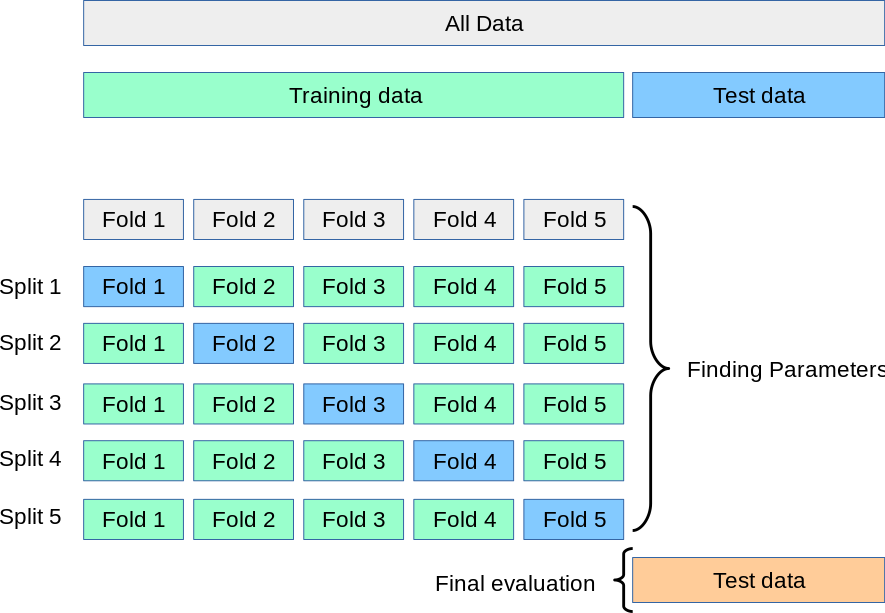

K-Fold Cross-Validation is a technique used to evaluate a model's performance more 
reliably than a simple train-test split. It splits the data into multiple subsets (folds) 
and trains the model multiple times, each time using a different fold as the validation set.

✅ Purpose of train_test_split()
It splits the dataset into training and test sets before applying cross-validation.
The test set remains untouched during cross-validation and is used only for final evaluation after model training.
This helps in measuring how well the model generalizes to unseen data.

✅ Purpose of KFold Cross-Validation
It splits only the training data further into multiple train-validation folds.
This helps to tune the model and estimate performance without using the test set multiple times (which could lead to data leakage).

What Would Happen Without train_test_split()?
If you apply KFold directly on the entire dataset (X, y), you won't have a separate test set for final evaluation.

🔥 Correct Workflow
1) Split the dataset into training (70%) and test (30%) using train_test_split().
2) Apply K-Fold cross-validation on the training set (X_train, y_train) to find the best model.
3) Train the final model on the full training set (X_train, y_train).
4) Evaluate the final model on the test set (X_test, y_test).

💡 Each iteration does this:
1) A new subset of data is used for training.
2) The model is initialized fresh (it doesn’t remember anything from previous folds).
3) The trained model is only used to evaluate on the current validation set.
4) The process repeats K times.


📌 If We Train on the Full Training Set, What’s the Purpose of K-Fold?
Even though we ultimately train the model on the full dataset, K-Fold Cross-Validation is crucial because it helps us:

1️⃣ Estimate Model Performance More Reliably
If we only train once on the full training set and test on a single validation/test set, our evaluation depends too much on that specific split.
K-Fold provides a more stable and reliable performance estimate by testing on multiple different subsets of data.

2️⃣ Detect Overfitting or Underfitting
If performance varies significantly across folds, it indicates that the model is not generalizing well.
If training error is low but validation error is high, the model is overfitting.

3️⃣ Select the Best Model or Hyperparameters
Often, we try different models or hyperparameters.
Instead of testing each model on a single train-test split, K-Fold helps us pick the best one based on multiple validation sets.

4️⃣ Make the Most of Limited Data
Instead of setting aside a large chunk of data for validation, K-Fold lets us use the full dataset for training after evaluation.


In [8]:
from sklearn.model_selection import KFold
import numpy as np

# KFold Cross-Validation (5 Folds)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
model = LinearRegression()

# Store errors for comparison
train_errors = []
val_errors = []


for fold, (train_index, val_index) in enumerate(kf.split(diabetes.data, diabetes.target)):
    
    X_train_fold, X_val_fold = diabetes.data[train_index], diabetes.data[val_index]
    y_train_fold, y_val_fold = diabetes.target[train_index], diabetes.target[val_index]

    # Train model
    model.fit(X_train_fold, y_train_fold)
    
    # Predict on training and validation folds
    y_train_pred_fold = model.predict(X_train_fold)
    y_val_pred_fold = model.predict(X_val_fold)

    # Compute errors
    mse_train_fold = mean_squared_error(y_train_fold, y_train_pred_fold)
    mse_val_fold = mean_squared_error(y_val_fold, y_val_pred_fold)

    train_errors.append(mse_train_fold)
    val_errors.append(mse_val_fold)

    print(f"Fold {fold + 1}:")
    print(f"   Training MSE: {mse_train_fold:.4f}")
    print(f"   Validation MSE: {mse_val_fold:.4f}")    


# Compute mean validation error across all folds
mean_val_error = np.mean(val_errors)
print(f"\nAverage Validation MSE across folds: {mean_val_error:.4f}")

# Split dataset into training & test sets, Retrain model on full training set before final test evaluation. 
# Training on the full set helps it learn from all available examples before final testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model.fit(X_train, y_train)

# Predict on test set
y_test_pred = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f"\nFinal Test Set MSE: {mse_test:.4f}")


Fold 1:
   Training MSE: 2868.5497
   Validation MSE: 2900.1936
Fold 2:
   Training MSE: 2924.9764
   Validation MSE: 2662.6376
Fold 3:
   Training MSE: 2780.7943
   Validation MSE: 3312.3059
Fold 4:
   Training MSE: 2898.6741
   Validation MSE: 2797.8836
Fold 5:
   Training MSE: 2741.9442
   Validation MSE: 3403.8878

Average Validation MSE across folds: 3015.3817

Final Test Set MSE: 2821.7510



Train Indices for Fold 1: [  0   1   2   4   6   8  10  11  12  13  14  15  16  18  19  20  21  22
  23  26  27  28  29  30  31  32  34  35  36  37  38  39  40  41  43  44
  47  48  49  50  51  52  53  54  55  56  58  59  61  62  64  65  66  67
  68  69  70  71  72  74  78  79  80  81  83  85  86  87  88  89  90  91
  94  95  96  97  98  99 100 102 103 105 106 107 109 110 111 112 115 116
 117 118 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135
 136 138 139 140 141 142 143 144 146 147 148 149 150 151 152 153 154 156
 157 159 160 161 162 165 166 167 169 170 171 172 174 175 176 177 178 180
 182 183 185 186 187 188 189 190 191 192 193 194 199 200 201 202 203 204
 205 207 208 209 211 212 213 214 215 216 217 218 219 220 221 222 223 225
 227 228 229 231 232 233 234 235 236 237 238 240 241 243 245 246 247 248
 249 250 252 253 254 255 256 257 258 260 261 262 263 264 265 266 267 268
 269 270 271 272 273 275 276 277 278 279 280 281 282 283 285 287 290 291
 292 293 294 296 298 299

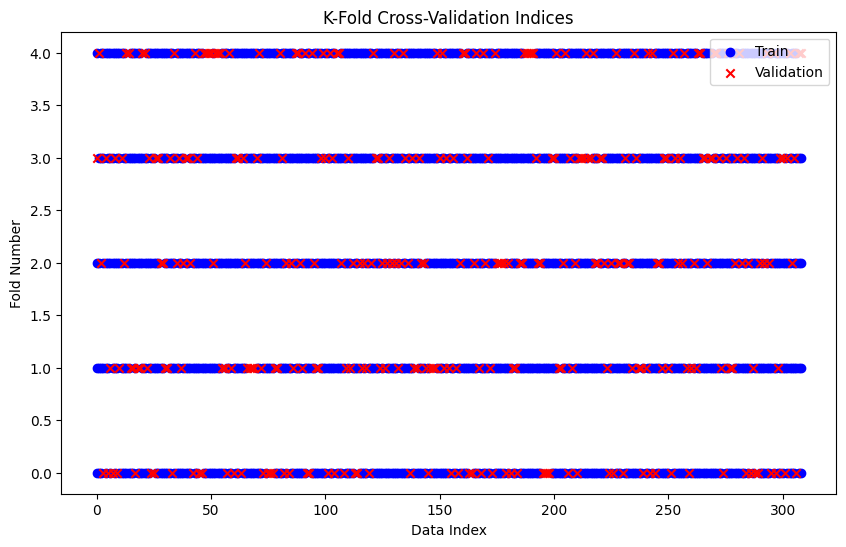

In [15]:
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
import numpy as np

kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Different colors for train and validation indices
train_color = 'blue'
val_color = 'red'

for fold, (train_index, val_index) in enumerate(kf.split(X_train, y_train)):
    ax.scatter(train_index, [fold] * len(train_index), color=train_color, marker='o', label="Train" if fold == 0 else "")
    ax.scatter(val_index, [fold] * len(val_index), color=val_color, marker='x', label="Validation" if fold == 0 else "")

    print(f"\nTrain Indices for Fold {fold + 1}:", train_index)
    print(f"\nValidation Indices for Fold {fold + 1}:", val_index)

ax.set_xlabel('Data Index')
ax.set_ylabel('Fold Number')
ax.set_title('K-Fold Cross-Validation Indices')
ax.legend()
plt.show()


**Reimplement the above lab on the California Housing dataset.**


In [21]:
from sklearn.datasets import fetch_california_housing

california_housing = fetch_california_housing()
X_california = california_housing.data
y_california = california_housing.target

print("California Housing Dataset:")
print(f"X_train shape: {X_california.shape}, y_train shape: {y_california.shape}")


California Housing Dataset:
X_train shape: (20640, 8), y_train shape: (20640,)


In [23]:
from sklearn.model_selection import train_test_split

X_train, X_temp, Y_train, Y_temp = train_test_split(X_california, y_california, test_size = 0.2, random_state = 42) #80% samples for training and 20% temp
X_test, X_val, Y_test, Y_val = train_test_split(X_temp, Y_temp, test_size = 0.25, random_state = 42) #75% for testing and 25% validation

In [25]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, Y_train) # Training model
y_pred = model.predict(X_val)
mse = mean_squared_error(Y_val, y_pred)
print(f"Mean Squared Error on Validation Set: {mse}")

Y_test_pred = model.predict(X_test)
mse = mean_squared_error(Y_test, Y_test_pred)
print(f"Mean Squared Error on Test Set: {mse}")

Mean Squared Error on Validation Set: 0.48968053804822576
Mean Squared Error on Test Set: 0.5779619522442482


In [27]:
from sklearn.model_selection import KFold, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error



X_train, X_test, Y_train, Y_test = train_test_split(X_california, y_california, test_size=0.3, random_state=42)
num_of_folds = 5
kf = KFold(n_splits = num_of_folds, shuffle = True, random_state = 42)
model = LinearRegression()

for fold, (train_index, val_index) in enumerate(kf.split(X_train, Y_train)):
  X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
  Y_train_fold, Y_val_fold = Y_train[train_index], Y_train[val_index]
  model.fit(X_train_fold, Y_train_fold)
  Y_val_pred_fold = model.predict(X_val_fold)
  mse_fold = mean_squared_error(Y_val_fold, Y_val_pred_fold)
  print(f"Fold {fold + 1}: Mean Squared Error on Validation Set: {mse_fold}")

Y_test_pred = model.predict(X_test)
mse_test = mean_squared_error(Y_test, Y_test_pred)
print(f"\nMean Squared Error on Test Set: {mse_test}")

Fold 1: Mean Squared Error on Validation Set: 0.5350325216466308
Fold 2: Mean Squared Error on Validation Set: 0.548776144890888
Fold 3: Mean Squared Error on Validation Set: 0.5314200767117516
Fold 4: Mean Squared Error on Validation Set: 0.5111429089670001
Fold 5: Mean Squared Error on Validation Set: 0.4997884154828322

Mean Squared Error on Test Set: 0.5357763124366638


Train Index for Fold 1: [    0     1     2 ... 14443 14444 14445]
Val Index for Fold 1: [    8    14    15 ... 14427 14446 14447]
Train Index for Fold 2: [    1     2     4 ... 14445 14446 14447]
Val Index for Fold 2: [    0     3    10 ... 14438 14442 14444]
Train Index for Fold 3: [    0     1     2 ... 14445 14446 14447]
Val Index for Fold 3: [   12    26    28 ... 14440 14441 14443]
Train Index for Fold 4: [    0     1     3 ... 14445 14446 14447]
Val Index for Fold 4: [    2     6     7 ... 14435 14436 14439]
Train Index for Fold 5: [    0     2     3 ... 14444 14446 14447]
Val Index for Fold 5: [    1     4     5 ... 14428 14431 14445]


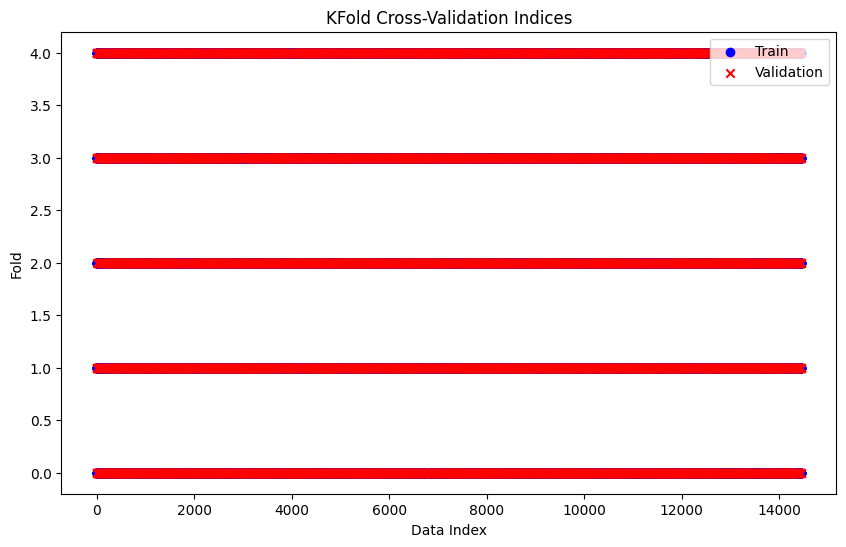

In [30]:
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Plot the indices for each fold
fig, ax = plt.subplots(figsize=(10, 6))

for fold, (train_index, val_index) in enumerate(kf.split(X_train, Y_train)):
    ax.scatter(train_index, [fold] * len(train_index), 
               label='Train' if fold == 0 else None, marker='o', color='blue')
    ax.scatter(val_index, [fold] * len(val_index), 
               label='Validation' if fold == 0 else None, marker='x', color='red')

    print(f"Train Index for Fold {fold+1}:", train_index)
    print(f"Val Index for Fold {fold+1}:", val_index)

ax.set_xlabel('Data Index')
ax.set_ylabel('Fold')
ax.set_title('KFold Cross-Validation Indices')
ax.legend()
plt.show()
